In [2]:
import pandas as pd
import numpy as np

summary6 = open("summary6.csv", "r")

rem_text = summary6.read()
text_split = rem_text.split('\n')
rem_data = np.array(text_split[0].split(','))

bad_list = ['P008']
for i in range(1, len(text_split)-1):
    line = text_split[i].split(',')
    if line[1] not in bad_list:
        rem_data = np.vstack((rem_data, line))
        
pd.set_option('display.max_columns', None)
df = pd.DataFrame(rem_data[1:], columns=rem_data[0])
df

,name,id,o_rem_num,x_rem_num,o_rem_duration,x_rem_duration,o_rem_avg,x_rem_avg,o_rem_frag,x_rem_frag,o_rem_density,x_rem_density,o_am_vas,x_am_vas,o_pm_vas,x_pm_vas,o_am_cortisol,x_am_cortisol,o_pm_cortisol,x_pm_cortisol,note,age,exp,o_ahi,o_ai,o_hi,x_ahi,x_ai,x_hi,o_start,x_start,o_rem_latency,x_rem_latency,o_rem_per,x_rem_per,o_n3,x_n3,o_arousal,x_arousal,o_se,x_se,o_stage_change,x_stage_change
0,陳碧蓮,P001,9,6,4620,2460,513,410,6.4372,6.1911,17.749,36.22,.,.,.,.,10.8,5.9,5.7,3.4,.,60,19,19.2,4.4,14.8,22.1,5.9,16.2,21:27:15,21:27:15,4950,12990,18.1,11.5,0.9,10,24.5,28.7,87,80.5,15.68,20.65
1,陳佳星,P002,7,8,4740,3990,677,499,0.6371,2.9749,20.612,12.857,5,5,3,4,6.4,9.3,4.1,7.9,x_fs=200訊號有干擾,35,0.6,2.2,0.2,2.1,3.6,0.3,3.3,22:30:58,22:29:10,8550,3720,20.9,16.6,21.8,23,6.5,14.3,88.1,85.7,14.7,17.98
2,袁賽芳,P003,6,5,3990,5700,655,1140,7.0125,6.8386,20.401,11.509,3,2,5,3,7.7,9.3,4.7,5.8,o_fs=200訊號有干擾,54,10,39.7,9.7,30,36.7,7,29.7,22:43:54,22:17:49,6420,6600,17.9,24.6,15.5,19.6,31.6,24.6,93.6,83,17.35,13.7
3,鄭雅菁,P004,9,8,4230,5190,470,649,5.2128,7.3565,32.648,32.486,3,2,4,2,8,5.7,6.3,5.1,x_fs=200,45,9,4.1,0,4.1,7.6,0,7.6,22:03:16,21:40:28,6330,8670,19.9,22.8,4.8,10.2,13.5,19.9,88,83.9,11.94,12.62
4,謝秀珍,P005,8,7,6780,6510,848,930,3.4794,3.596,12.537,18.095,.,.,.,.,8.6,5.9,4,4.2,.,54,6,3.8,0,3.8,3.9,0,3.9,22:15:43,21:06:21,3270,10320,28.8,25.8,12.1,2.7,12.2,10.6,94.2,88.7,12.53,10.45
5,黃淑惠,P006,7,8,4770,4860,681,608,7.0629,4.4959,7.4423,26.687,4,3,3,3,9.6,8.5,6.1,7.1,o_fs=200,54,13,24.7,4.1,20.5,25.2,0.6,24.6,23:00:14,22:33:19,4650,3150,21.9,26.6,4.6,0,25.3,23.3,92.6,83.7,15.83,1.34
6,陳淑美,P007,3,5,1920,1950,640,390,1.4323,3.5026,15.573,46.718,3,2,4,2,12.4,13.4,8.1,7.6,o_fs=200; eeg有干擾,48,6,0.9,0,0.9,1.7,0,1.7,22:45:03,20:44:25,15540,19440,10.2,9.3,3.9,14.1,24.6,20.2,74.2,76.4,17.9,20.93
7,郭秉羱,P009,6,7,3360,3900,560,557,0.9077,0.741,9.6131,11.692,3,2,4,7,10.1,11.4,7.4,7.2,.,19,0.4,2.5,0.8,1.7,1.8,0.6,1.2,22:45:29,22:34:36,8880,5820,13.1,15.9,16.8,13.1,10.7,11.4,95.5,93.2,16.14,17.53
8,張柏瑞,P010,7,7,2700,3930,386,561,9.5444,6.1959,32.148,19.211,.,.,.,.,11.3,7.1,5.3,4.6,o訊號怪怪的; x_fs=200,26,2.5,14,0.2,13.8,11.6,0.7,10.9,23:12:18,23:04:37,4500,4200,13,18.9,9.9,15.4,17.7,23.3,91,95.5,17.87,12.24
9,莊惠雅,P011,13,6,3210,1050,247,175,13.5,15.829,45.078,26.857,7,5,5,5,7.6,5.1,4.6,3.6,x_fs=200; x_eog高頻雜訊,43,20,29.2,0,29.2,31.8,0.7,31.1,22:49:00,22:57:05,4830,8400,16.7,6.7,5.8,8,38.5,52.3,88.9,72.7,17.03,26.86


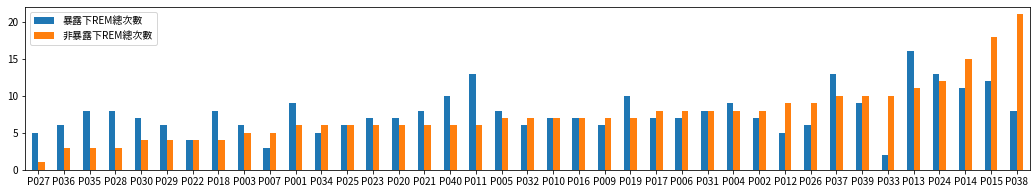

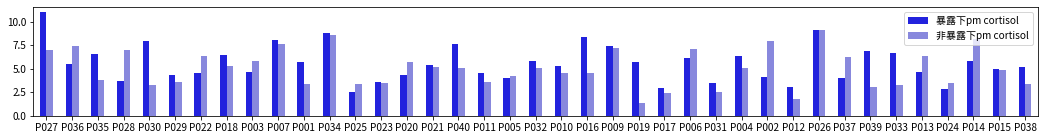

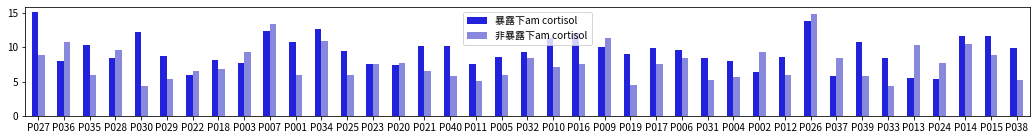

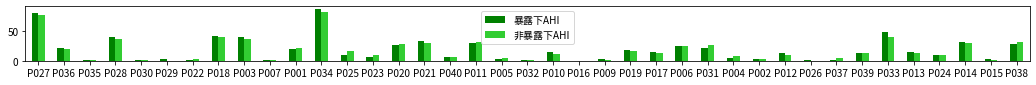

In [47]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
o_rem_num = np.array(df['o_rem_num'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_num'], dtype=np.int64)
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
rem_num = pd.DataFrame({'暴露下REM總次數': o_rem_num, '非暴露下REM總次數': x_rem_num}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM總次數')

ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol, '非暴露下REM總次數': x_rem_num}, index = ids)
df2 = df2.sort_values('非暴露下REM總次數')
df2 = df2.drop('非暴露下REM總次數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol, '非暴露下REM總次數': x_rem_num}, index = ids)
df2 = df2.sort_values('非暴露下REM總次數')
df2 = df2.drop('非暴露下REM總次數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi, '非暴露下REM總次數': x_rem_num}, index = ids)
df2 = df2.sort_values('非暴露下REM總次數')
df2 = df2.drop('非暴露下REM總次數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

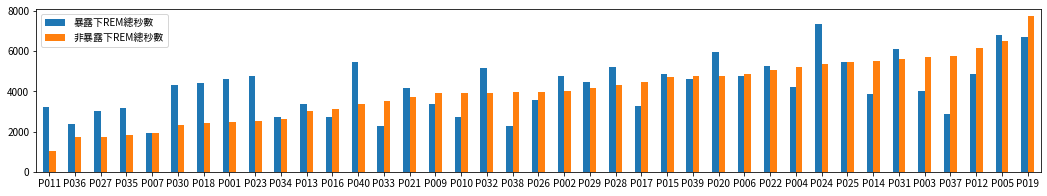

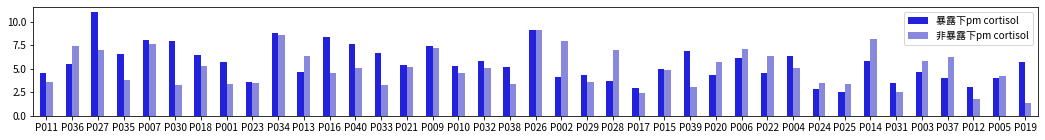

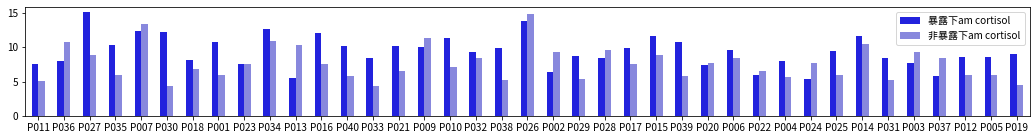

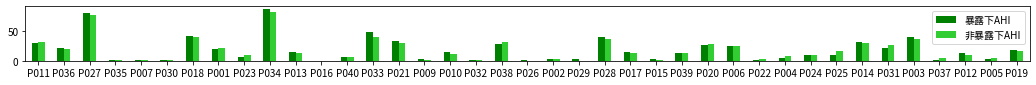

In [48]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
l = np.array(df['o_rem_duration'], dtype=np.int64)
r = np.array(df['x_rem_duration'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM總秒數': l, '非暴露下REM總秒數': r}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM總秒數')

ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol, '非暴露下REM總秒數': r}, index = ids)
df2 = df2.sort_values('非暴露下REM總秒數')
df2 = df2.drop('非暴露下REM總秒數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol, '非暴露下REM總秒數': r}, index = ids)
df2 = df2.sort_values('非暴露下REM總秒數')
df2 = df2.drop('非暴露下REM總秒數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi, '非暴露下REM總秒數': r}, index = ids)
df2 = df2.sort_values('非暴露下REM總秒數')
df2 = df2.drop('非暴露下REM總秒數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

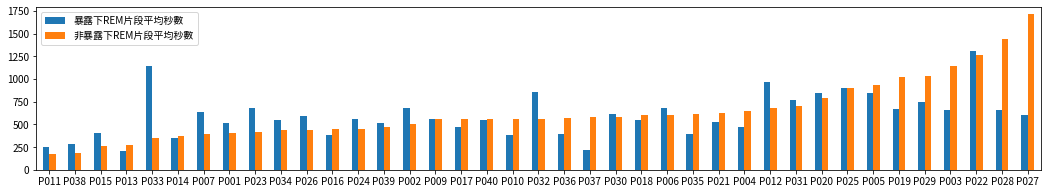

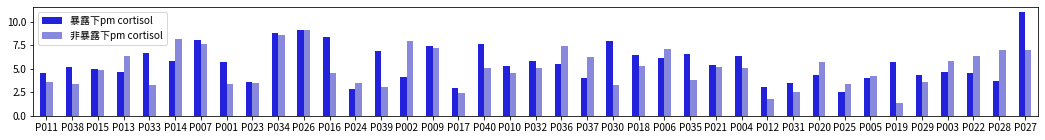

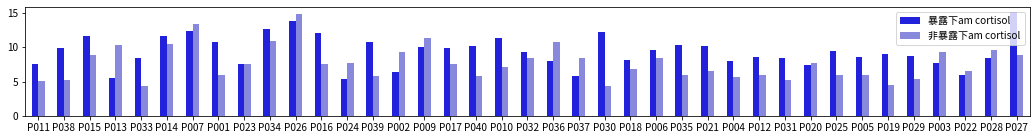

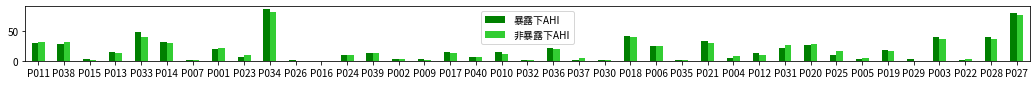

In [50]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
l = np.array(df['o_rem_avg'], dtype=np.int64)
r = np.array(df['x_rem_avg'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM片段平均秒數': l, '非暴露下REM片段平均秒數': r}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM片段平均秒數')

ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol, '非暴露下REM片段平均秒數': r}, index = ids)
df2 = df2.sort_values('非暴露下REM片段平均秒數')
df2 = df2.drop('非暴露下REM片段平均秒數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol, '非暴露下REM片段平均秒數': r}, index = ids)
df2 = df2.sort_values('非暴露下REM片段平均秒數')
df2 = df2.drop('非暴露下REM片段平均秒數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi, '非暴露下REM片段平均秒數': r}, index = ids)
df2 = df2.sort_values('非暴露下REM片段平均秒數')
df2 = df2.drop('非暴露下REM片段平均秒數', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

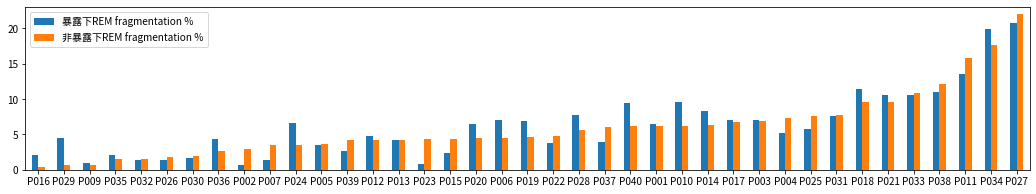

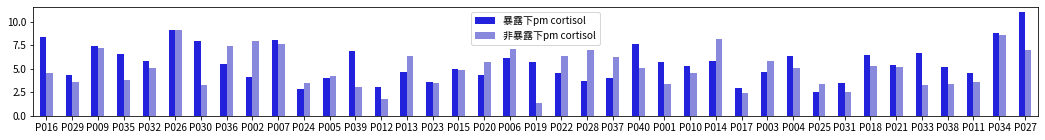

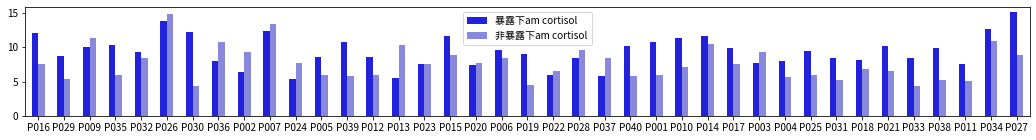

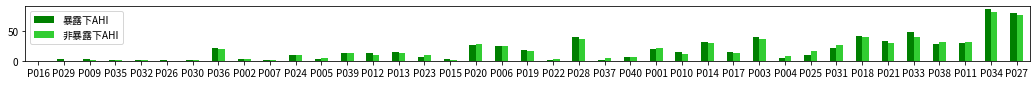

In [52]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
l = np.array(df['o_rem_frag'], dtype=np.single)
r = np.array(df['x_rem_frag'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM fragmentation %': l, '非暴露下REM fragmentation %': r}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM fragmentation %')

ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol, '非暴露下REM fragmentation %': r}, index = ids)
df2 = df2.sort_values('非暴露下REM fragmentation %')
df2 = df2.drop('非暴露下REM fragmentation %', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol, '非暴露下REM fragmentation %': r}, index = ids)
df2 = df2.sort_values('非暴露下REM fragmentation %')
df2 = df2.drop('非暴露下REM fragmentation %', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi, '非暴露下REM fragmentation %': r}, index = ids)
df2 = df2.sort_values('非暴露下REM fragmentation %')
df2 = df2.drop('非暴露下REM fragmentation %', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

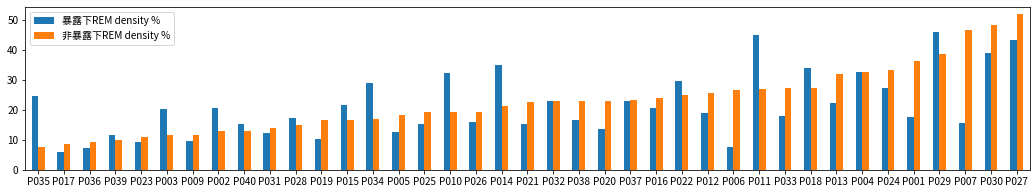

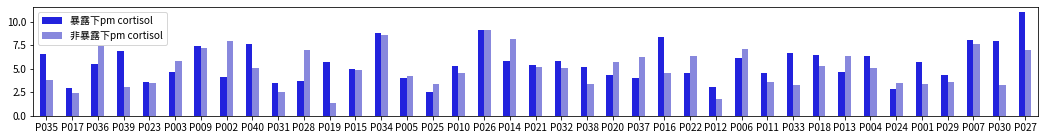

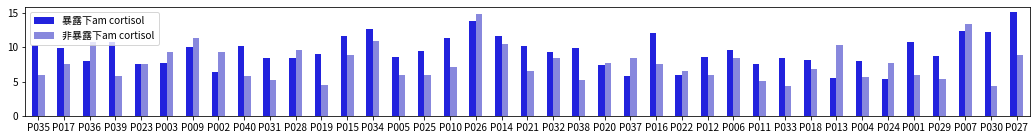

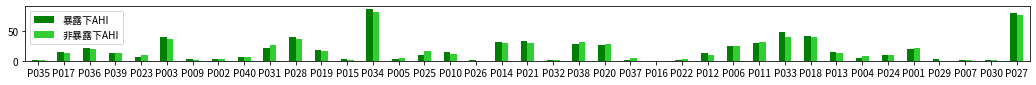

In [53]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
l = np.array(df['o_rem_density'], dtype=np.single)
r = np.array(df['x_rem_density'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM density %': l, '非暴露下REM density %': r}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM density %')

ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol, '非暴露下REM density %': r}, index = ids)
df2 = df2.sort_values('非暴露下REM density %')
df2 = df2.drop('非暴露下REM density %', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol, '非暴露下REM density %': r}, index = ids)
df2 = df2.sort_values('非暴露下REM density %')
df2 = df2.drop('非暴露下REM density %', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi, '非暴露下REM density %': r}, index = ids)
df2 = df2.sort_values('非暴露下REM density %')
df2 = df2.drop('非暴露下REM density %', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

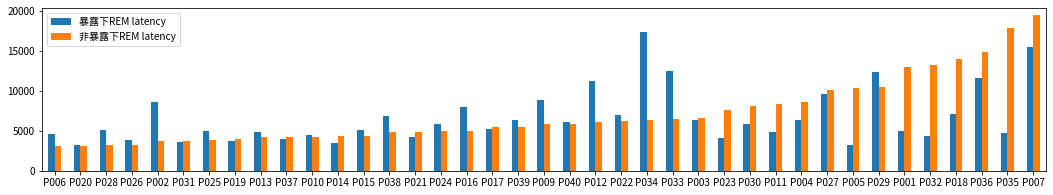

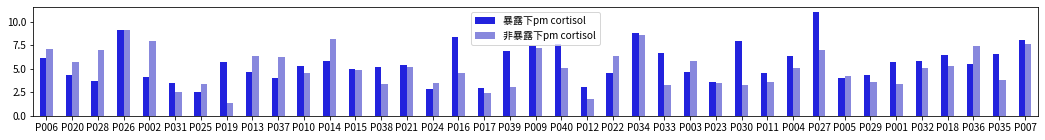

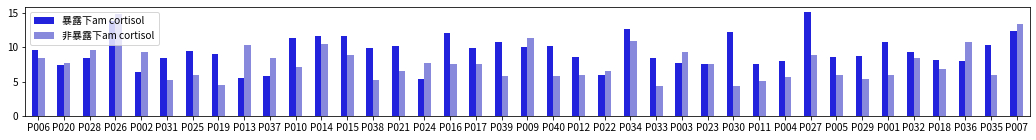

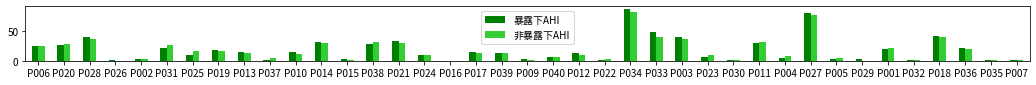

In [51]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
l = np.array(df['o_rem_latency'], dtype=np.single)
r = np.array(df['x_rem_latency'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM latency': l, '非暴露下REM latency': r}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM latency')


ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol, '非暴露下REM latency': r}, index = ids)
df2 = df2.sort_values('非暴露下REM latency')
df2 = df2.drop('非暴露下REM latency', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol, '非暴露下REM latency': r}, index = ids)
df2 = df2.sort_values('非暴露下REM latency')
df2 = df2.drop('非暴露下REM latency', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi, '非暴露下REM latency': r}, index = ids)
df2 = df2.sort_values('非暴露下REM latency')
df2 = df2.drop('非暴露下REM latency', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

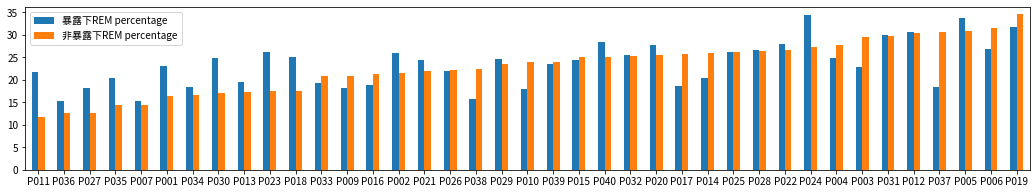

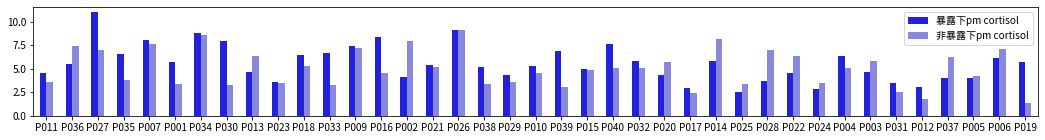

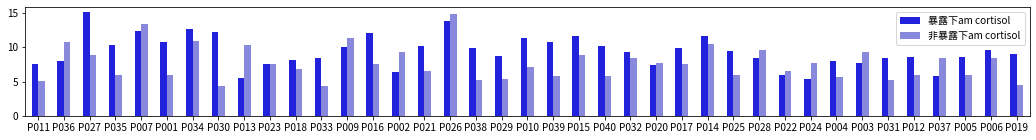

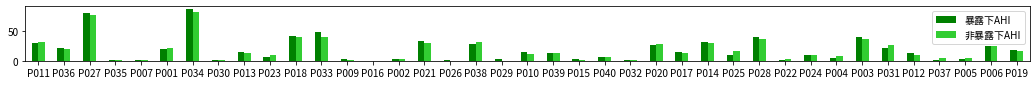

In [49]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

ids = np.array(df['id'])
l = np.array(df['o_rem_per'], dtype=np.single)
l = l + 5
r = np.array(df['x_rem_per'], dtype=np.single)
r = r + 5
rem_num = pd.DataFrame({'暴露下REM percentage': l, '非暴露下REM percentage': r}, index = ids)
rem_num = rem_num.sort_values('非暴露下REM percentage')

ax = rem_num.plot.bar(rot=0, figsize=(18,3))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下pm cortisol': o_pm_cortisol, '非暴露下pm cortisol': x_pm_cortisol,'非暴露下REM percentage': r}, index = ids)
df2 = df2.sort_values('非暴露下REM percentage')
df2 = df2.drop('非暴露下REM percentage', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_pm_cortisol = np.array(df['o_am_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_am_cortisol'], dtype=np.single)
df2 = pd.DataFrame({'暴露下am cortisol': o_pm_cortisol, '非暴露下am cortisol': x_pm_cortisol,'非暴露下REM percentage': r}, index = ids)
df2 = df2.sort_values('非暴露下REM percentage')
df2 = df2.drop('非暴露下REM percentage', 1)
ax = df2.plot.bar(rot=0, figsize=(18,2), color={"#8888dd", "#2222dd"})

o_ahi = np.array(df['o_ahi'], dtype=np.single)
x_ahi = np.array(df['x_ahi'], dtype=np.single)
df2 = pd.DataFrame({'暴露下AHI': o_ahi, '非暴露下AHI': x_ahi,'非暴露下REM percentage': r}, index = ids)
df2 = df2.sort_values('非暴露下REM percentage')
df2 = df2.drop('非暴露下REM percentage', 1)
ax = df2.plot.bar(rot=0, figsize=(18,1), color={"#008000", "#32cd32"})

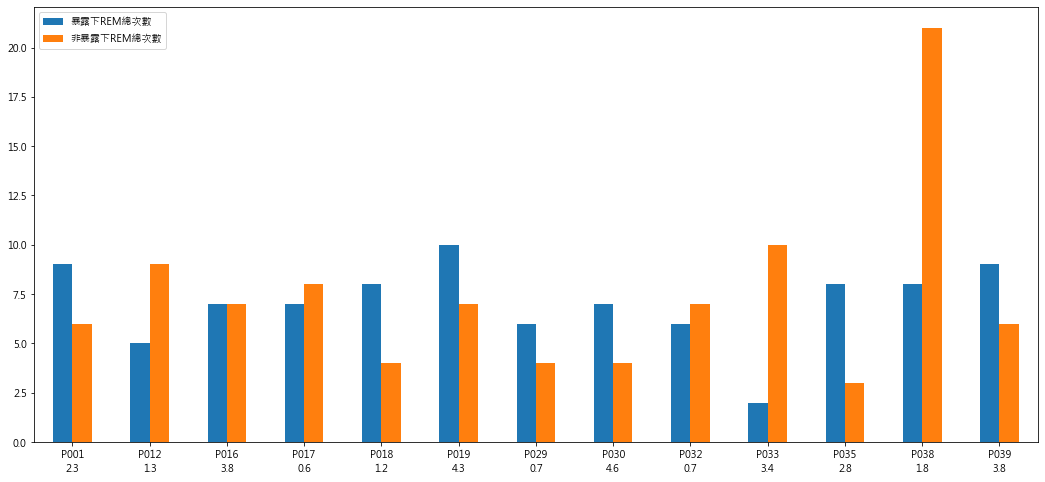

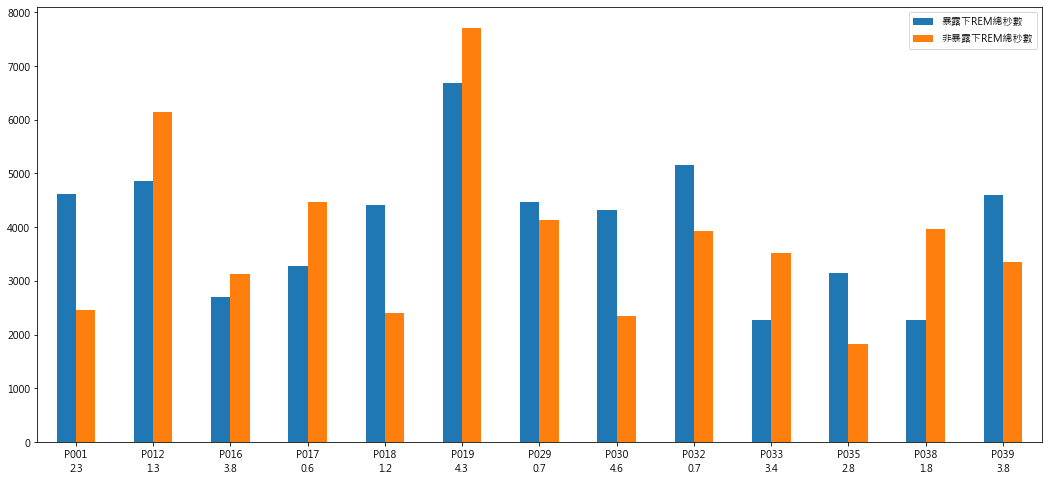

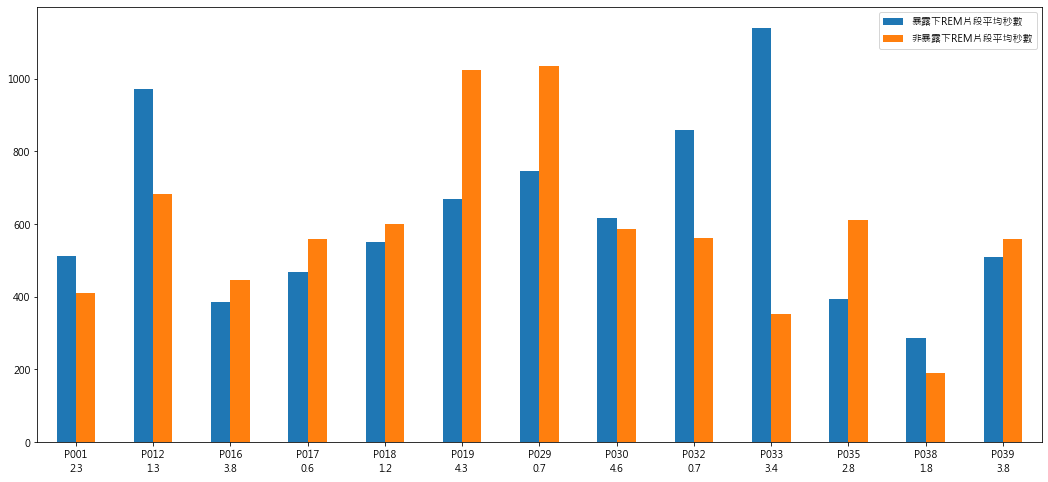

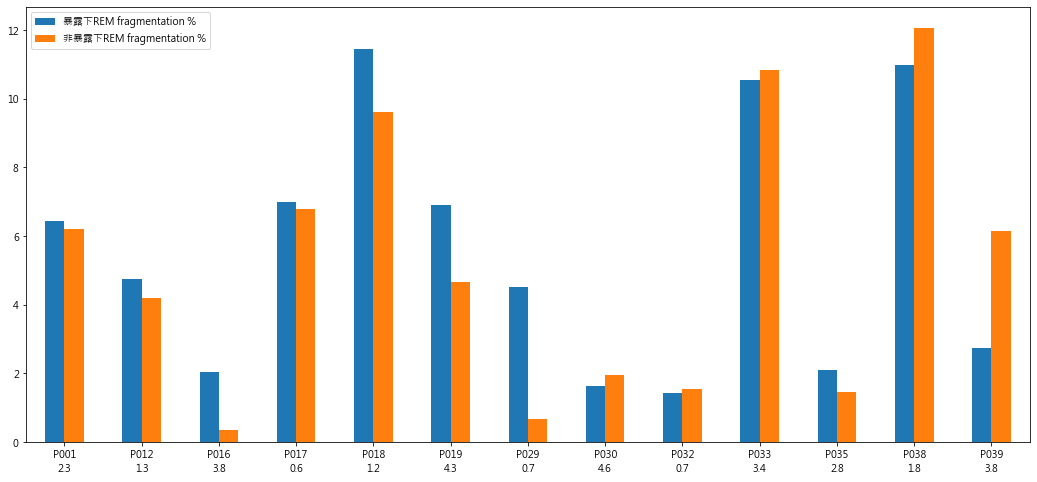

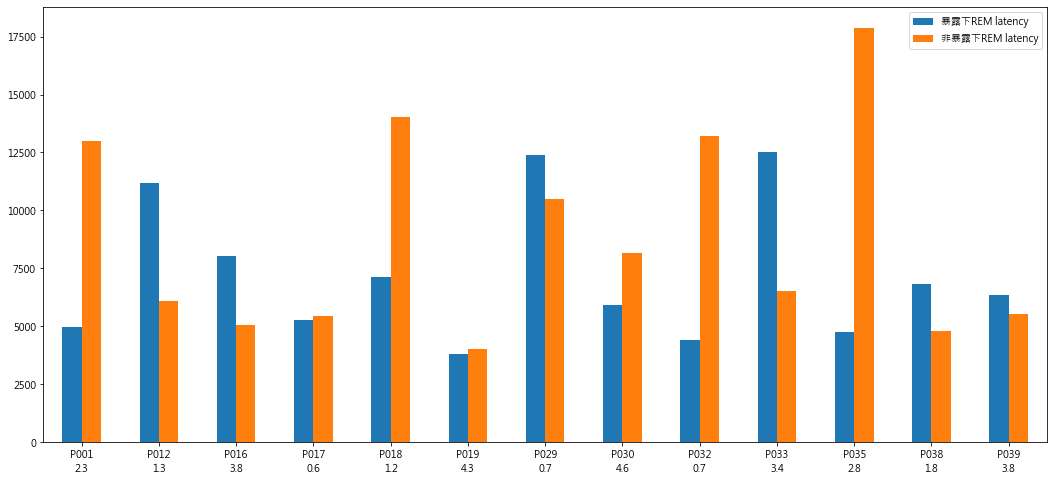

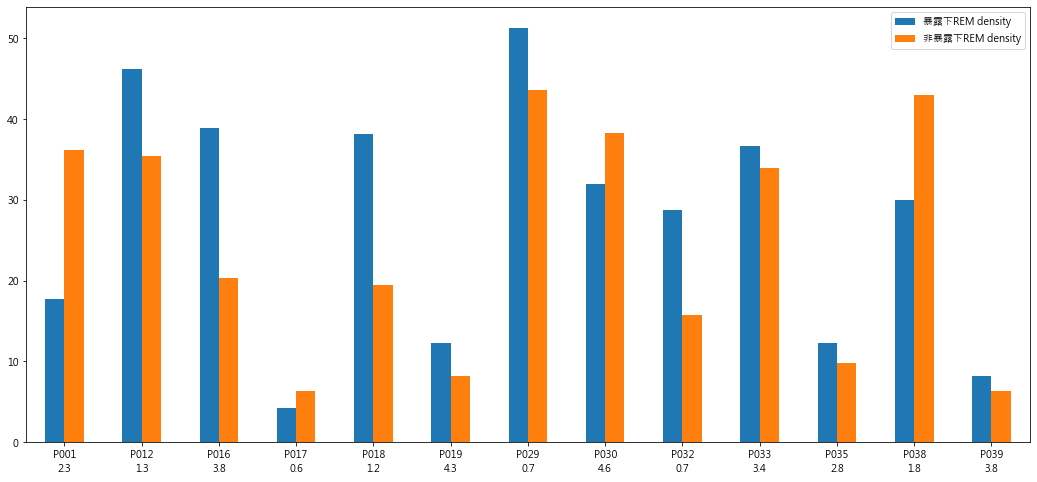

In [79]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

c1 = np.array(df['o_pm_cortisol'], dtype=np.single)
c2 = np.array(df['x_pm_cortisol'], dtype=np.single)
c3 = c1 - c2
t = 0.5

ids = np.array(df['id'])
ids = ids +'\n'+ np.round(c3, decimals=1).astype('str')

o_rem_num = np.array(df['o_rem_num'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_num'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM總次數': o_rem_num, '非暴露下REM總次數': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] <= t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_duration'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_duration'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM總秒數': o_rem_num, '非暴露下REM總秒數': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] <= t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_avg'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_avg'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM片段平均秒數': o_rem_num, '非暴露下REM片段平均秒數': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] <= t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_frag'], dtype=np.single)
x_rem_num = np.array(df['x_rem_frag'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM fragmentation %': o_rem_num, '非暴露下REM fragmentation %': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] <= t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_latency'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_latency'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM latency': o_rem_num, '非暴露下REM latency': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] <= t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_density'], dtype=np.single)
x_rem_num = np.array(df['x_rem_density'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM density': o_rem_num, '非暴露下REM density': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] <= t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

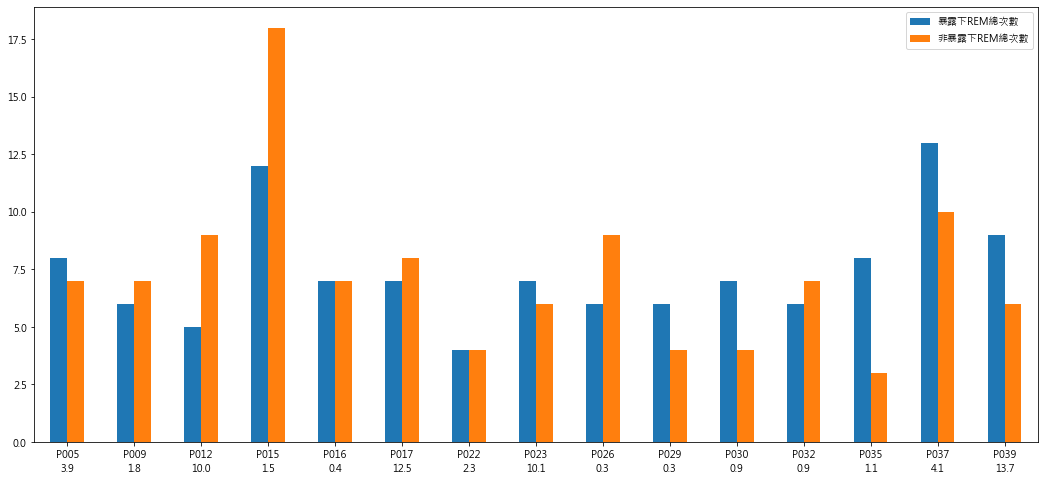

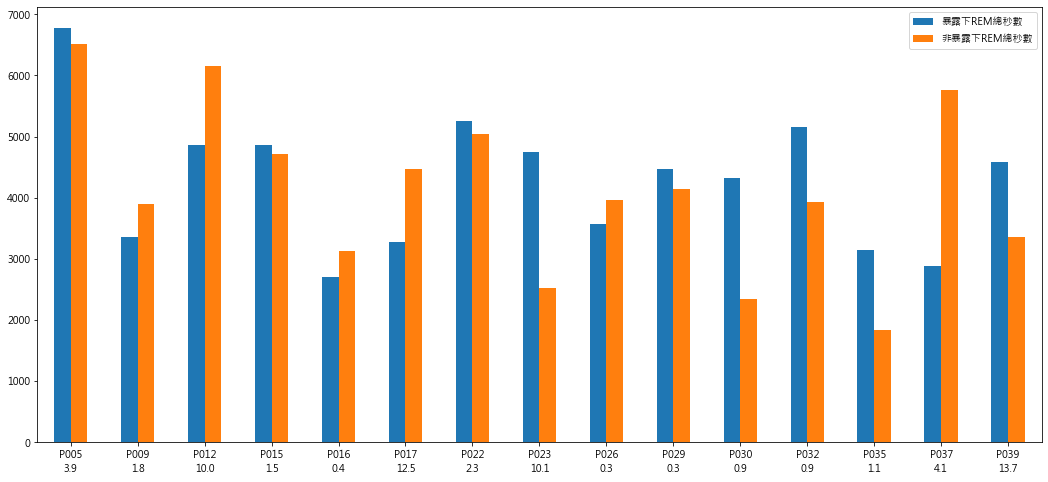

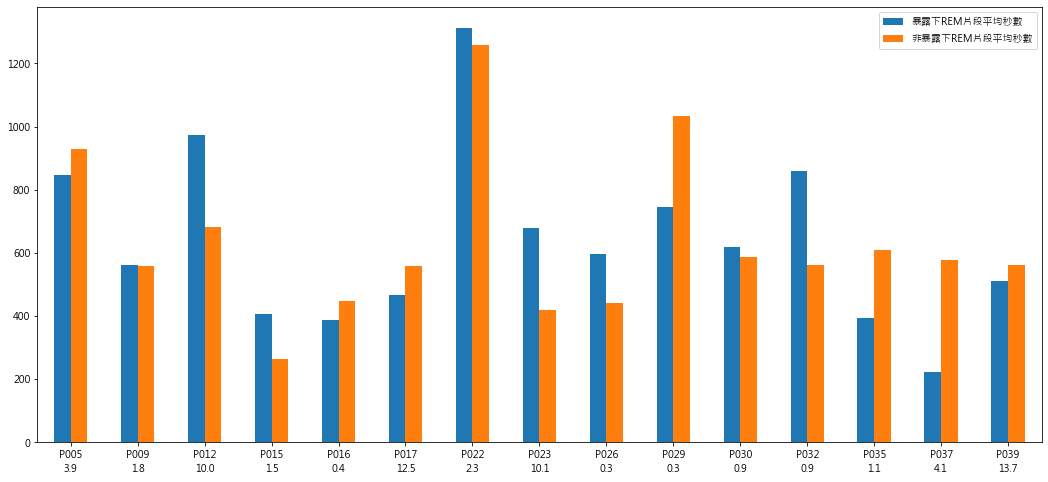

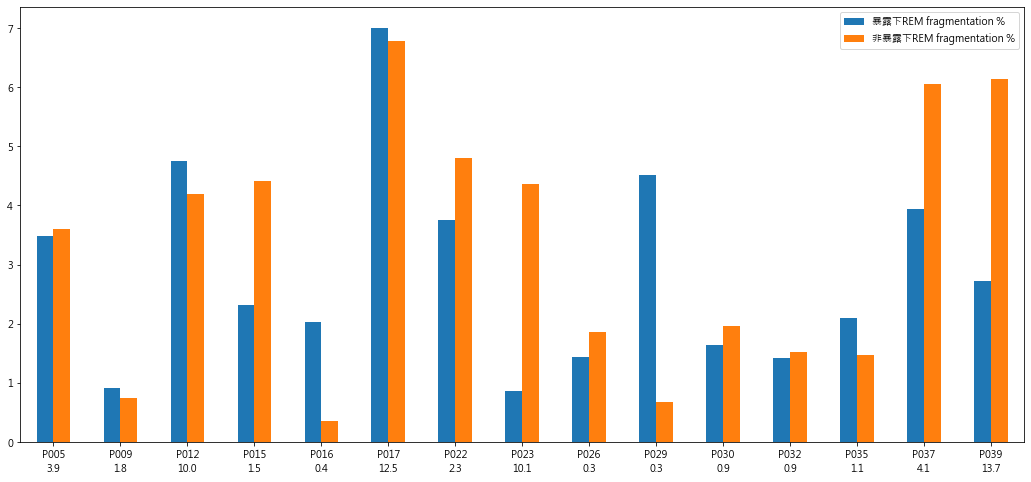

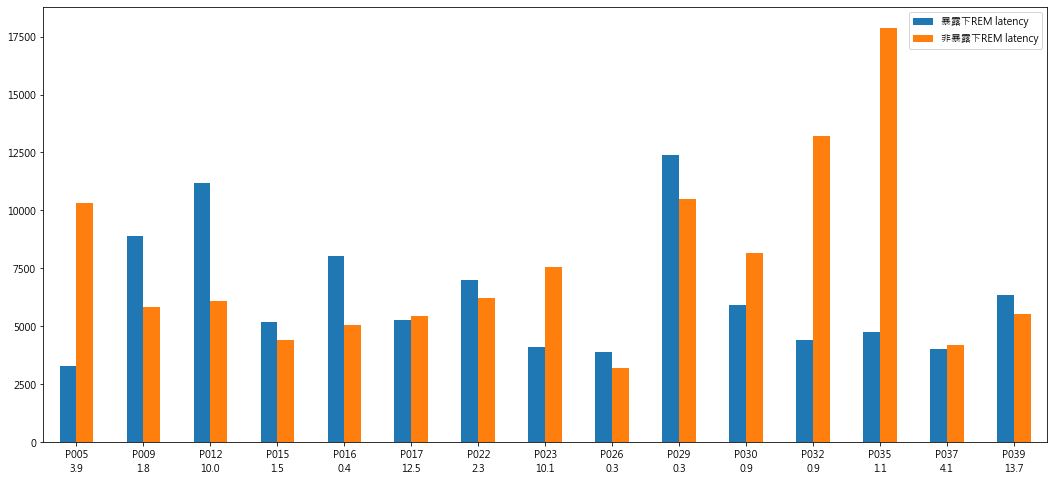

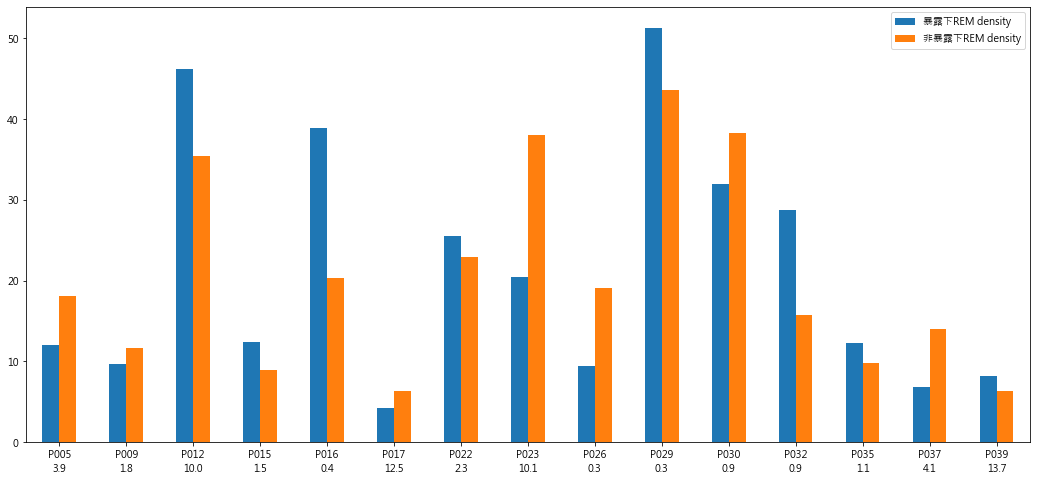

In [84]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

c1 = np.array(df['o_ahi'], dtype=np.single)
c3 = np.array(df['x_ahi'], dtype=np.single)
t = 15

ids = np.array(df['id'])
ids = ids +'\n'+ np.round(c3, decimals=1).astype('str')

o_rem_num = np.array(df['o_rem_num'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_num'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM總次數': o_rem_num, '非暴露下REM總次數': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] > t or c1[i] > t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_duration'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_duration'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM總秒數': o_rem_num, '非暴露下REM總秒數': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] > t or c1[i] > t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_avg'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_avg'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM片段平均秒數': o_rem_num, '非暴露下REM片段平均秒數': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] > t or c1[i] > t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_frag'], dtype=np.single)
x_rem_num = np.array(df['x_rem_frag'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM fragmentation %': o_rem_num, '非暴露下REM fragmentation %': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] > t or c1[i] > t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_latency'], dtype=np.int64)
x_rem_num = np.array(df['x_rem_latency'], dtype=np.int64)
rem_num = pd.DataFrame({'暴露下REM latency': o_rem_num, '非暴露下REM latency': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] > t or c1[i] > t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))

o_rem_num = np.array(df['o_rem_density'], dtype=np.single)
x_rem_num = np.array(df['x_rem_density'], dtype=np.single)
rem_num = pd.DataFrame({'暴露下REM density': o_rem_num, '非暴露下REM density': x_rem_num}, index = ids)

for i in range(len(c3)):
    if c3[i] > t or c1[i] > t:
        rem_num.drop(index=[ids[i]], inplace=True)
    
rem_num
ax = rem_num.plot.bar(rot=0, figsize=(18,8))